# Spin 1 mediator
## Analysis

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
plt.ioff()

In [2]:
# Unify csv
csvDir = "sim_outputs/spin1/csv/"
nFiles = 2
dataSignal = []
for j in range(3):
    csvFiles = [csvDir+f"DMspin1_gSq_only_{j+1}_{k+1}.csv" for k in range(nFiles)]
    dfs = [pd.read_csv(csvFile) for csvFile in csvFiles]
    data = pd.concat(dfs)
    data = construct_variables(data)
    dataSignal.append(data)
    data.to_csv(csvDir+f"DMspin1_gSq_only_{j+1}.csv")

In [3]:
csvDir = "sim_outputs/spin1/csv/"
data = [pd.read_csv(csvDir+f"DMspin1_gSq_only_{j+1}.csv") for j in range(3)]

In [4]:
print("Numbero de Eventos: ", [data[i].shape[0] for i in range(3)])

Numbero de Eventos:  [100000, 100000, 100000]


In [5]:
# Background
csvFile = "./background/ZpJets.csv"
data_ZpJ = pd.read_csv(csvFile)
csvFile = "./background/WpJets.csv"
data_WpJ = pd.read_csv(csvFile)

In [6]:
CSs = [[] for j in range(3)]
CSerrors = [[] for j in range(3)]

htmlDir = "sim_outputs/spin1/html/"
nFiles = 2
for j in range(3):
    htmlFiles = [htmlDir+f"DMspin1_gSq_only_{j+1}_{k+1}.html" for k in range(nFiles)]
    for k in range(nFiles):
        with open(htmlDir+f"DMspin1_gSq_only_{j+1}_{k+1}.html", 'r') as htmlFile:
            htmlText = htmlFile.read()
        indexS = htmlText.find("<b>s= ")
        indexPM = htmlText.find(" &#177 ")
        indexPB = htmlText.find(" (pb)")
        CSs[j].append(float(htmlText[indexS+6:indexPM]))
        CSerrors[j].append(float(htmlText[indexPM+7:indexPB]))


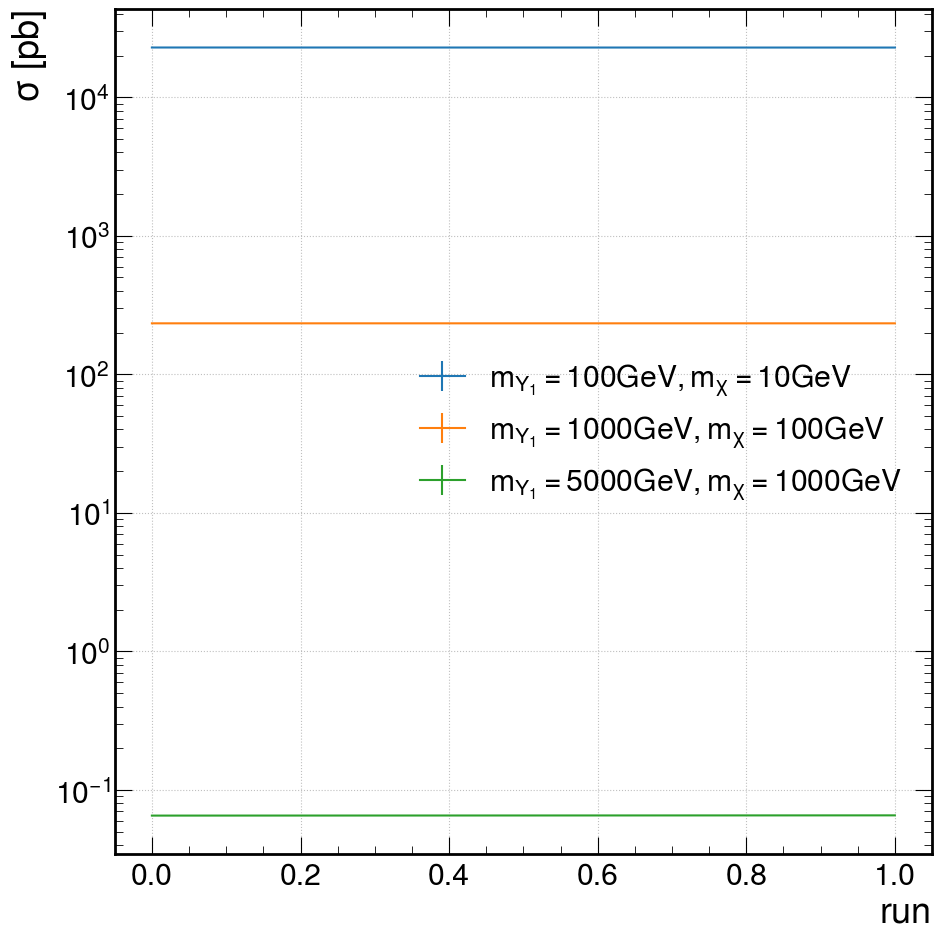

In [7]:
fig, ax = plt.subplots()

massPoints = [r"$m_{Y_{1}} = 100GeV, m_{\chi} = 10 GeV$",
              r"$m_{Y_{1}} = 1000GeV, m_{\chi} = 100 GeV$",
              r"$m_{Y_{1}} = 5000GeV, m_{\chi} = 1000 GeV$"]

for i in range(3):
    ax.errorbar(x=range(2), y=CSs[i], yerr=CSerrors[i], label=massPoints[i])

ax.legend()
ax.set_ylabel(r'$\sigma$ [pb]')
ax.set_xlabel('run')
ax.grid()
ax.set_yscale('log')
fig.tight_layout()
plt.show()

In [8]:
CS = []
for sigma in CSs:
    CS.append(np.mean(sigma))

In [9]:
CS

[22834.0, 233.345, 0.0654595]

In [10]:
data[0]

,Unnamed: 0,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,...,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi,Delta_phi,Delta_rapidity,Inv_mass,Rapidity_prod,Hadronic_energy
0,0,80.981860,26.637465,21.995190,10.768453,0.148990,2.638907,3.103195,3.662650,-0.065423,...,0.0,0.0,0.0,98.625180,2.954881,1.146353,2.489917,136.825744,0.393171,140.382968
1,1,45.562565,44.971930,16.141575,9.697227,-1.789925,-2.439331,1.558544,0.545162,2.536021,...,0.0,0.0,0.0,48.706993,-2.525519,2.316530,0.649406,126.440357,4.366220,116.373297
2,2,62.351960,17.451275,6.007831,4.015706,0.934584,2.110173,1.365179,4.491027,1.732550,...,0.0,0.0,0.0,44.103287,-1.201248,2.896751,1.175588,126.135588,1.972134,89.826771
3,3,35.790657,27.536840,17.099865,14.294047,2.781854,1.682870,-0.550996,-0.774408,-1.681304,...,0.0,0.0,0.0,13.329530,2.774610,2.406023,1.098984,87.933722,4.681498,94.721409
4,4,21.460012,14.271392,11.405839,9.244654,-0.661400,2.245356,2.107273,4.037921,-0.731168,...,0.0,0.0,0.0,47.447433,1.569699,1.109161,2.906755,67.756946,-1.485077,56.381897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,49995,111.564800,87.844290,16.626852,7.307886,1.575887,2.584260,1.536552,1.025132,0.260976,...,0.0,0.0,0.0,27.890425,-2.583841,3.068220,1.008373,425.157282,4.072502,223.343828
99996,49996,39.768066,28.867702,11.178156,7.348786,2.749969,0.604587,0.388633,-2.224380,2.214520,...,0.0,0.0,0.0,46.914394,-1.997417,2.325148,2.145382,43.702056,1.662595,87.162710
99997,49997,98.863810,54.996160,29.577047,25.651470,2.321034,0.980548,-0.293191,-1.694065,2.689833,...,0.0,0.0,0.0,180.642700,0.016057,0.109578,1.340486,106.104247,2.275886,209.088487
99998,49998,91.328830,56.056103,30.979584,25.716864,2.064066,0.681887,0.145015,1.773796,1.796386,...,0.0,0.0,0.0,87.369680,-2.826333,2.350363,1.382179,180.304222,1.407460,204.081381


Baseline selection

- Number of jets > 1
- $\eta(j_{1})\cdot\eta(j_{2})$ < 0
- Leading jets $p_{T}$ > 30GeV
- Leading jets $|\eta|$ < 5
- $H_{T}$ > 200GeV
- $p_{T}^{miss}$ > 50GeV

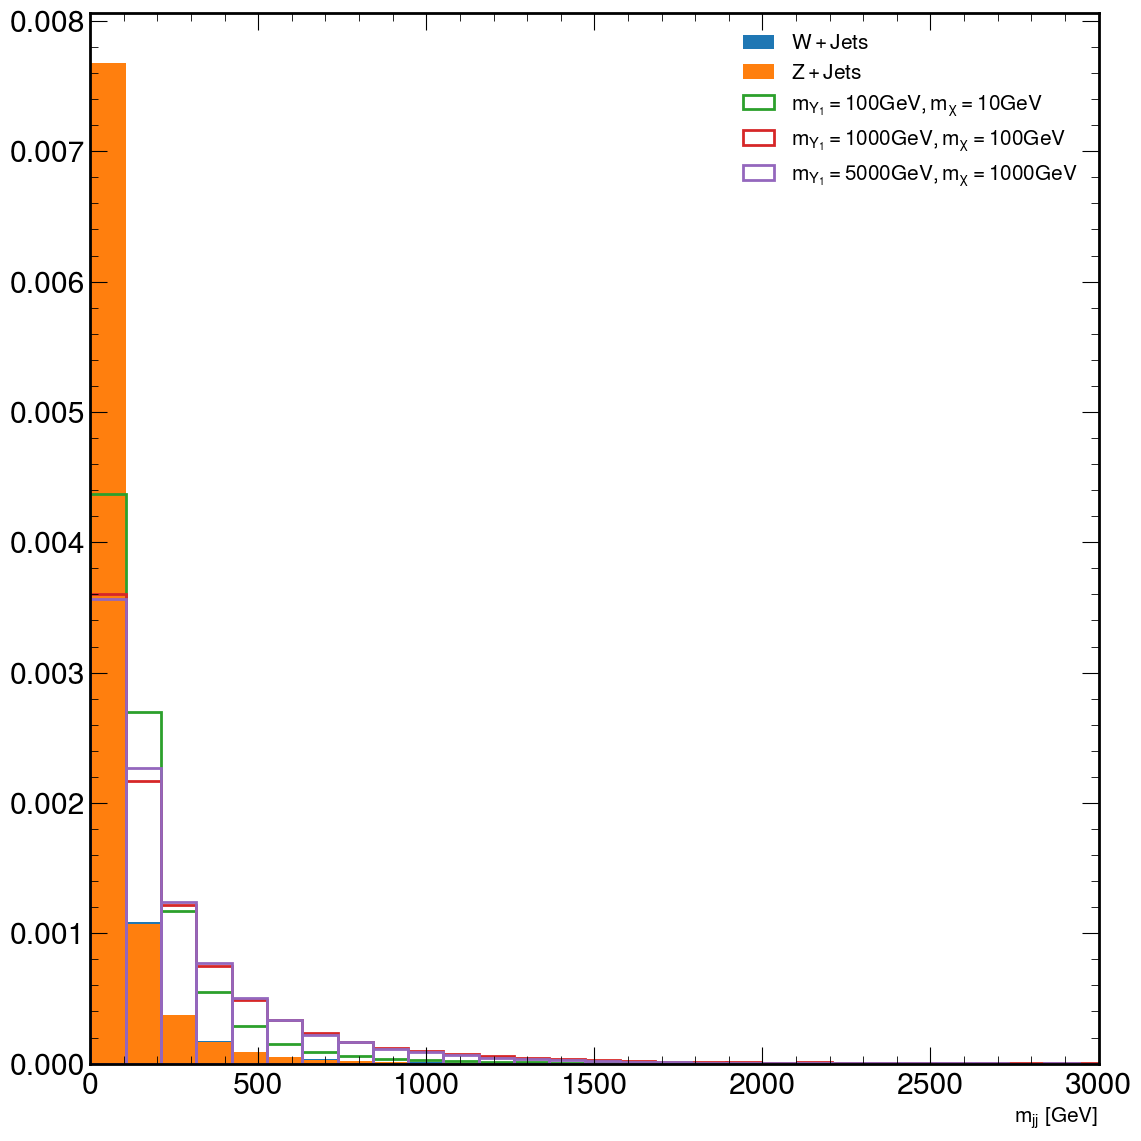

In [11]:
fig, ax = plt.subplots(figsize=(12,12))

variable = 'Inv_mass'
nBins = 40
rango = np.linspace(min(data[0][variable]), max(data[0][variable]), nBins)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colorsIter = iter(colors)

ax.hist(data_WpJ[variable], bins=rango, density=True, color=next(colorsIter), label=r'$W+Jets$')
ax.hist(data_ZpJ[variable], bins=rango, density=True, color=next(colorsIter), label=r'$Z+Jets$')

for j in range(3):
    color = next(colorsIter)
    ax.hist(data[j][variable], bins=rango, density=True, color=color, edgecolor=color, fc='None', lw=2, label=massPoints[j])

ax.legend(fontsize=15)
ax.set_xlabel(r"$m_{jj}$ [GeV]", fontsize=15)
ax.set_xlim(0,3000)

fig.tight_layout()
plt.show()

In [12]:
query = 'jet_pt1.notna() &\
         Rapidity_prod < 0 &\
         jet_pt0 > 30 &\
         jet_pt1 > 30 &\
         abs(jet_eta0) < 5 &\
         abs(jet_eta1) < 5 &\
         Hadronic_energy > 200 &\
         missinget_met > 50'

for j in range(3):
    data[j] = data[j].query(query)

data_WpJ = data_WpJ.query(query)
data_ZpJ = data_ZpJ.query(query)

In [13]:
print("Númbero de Eventos")
print("Modelos: ", [data[j].shape[0] for j in range(2)])
print("BG(W+j,Z+j):", [data_WpJ.shape[0], data_ZpJ.shape[0]])

Númbero de Eventos
Modelos:  [6678, 22305]
BG(W+j,Z+j): [5763, 9467]


In [15]:
def normalize_hist(yvalues, hist):
    for item in hist:
        item.set_height(item.get_height() / sum(yvalues))
    return yvalues.max()

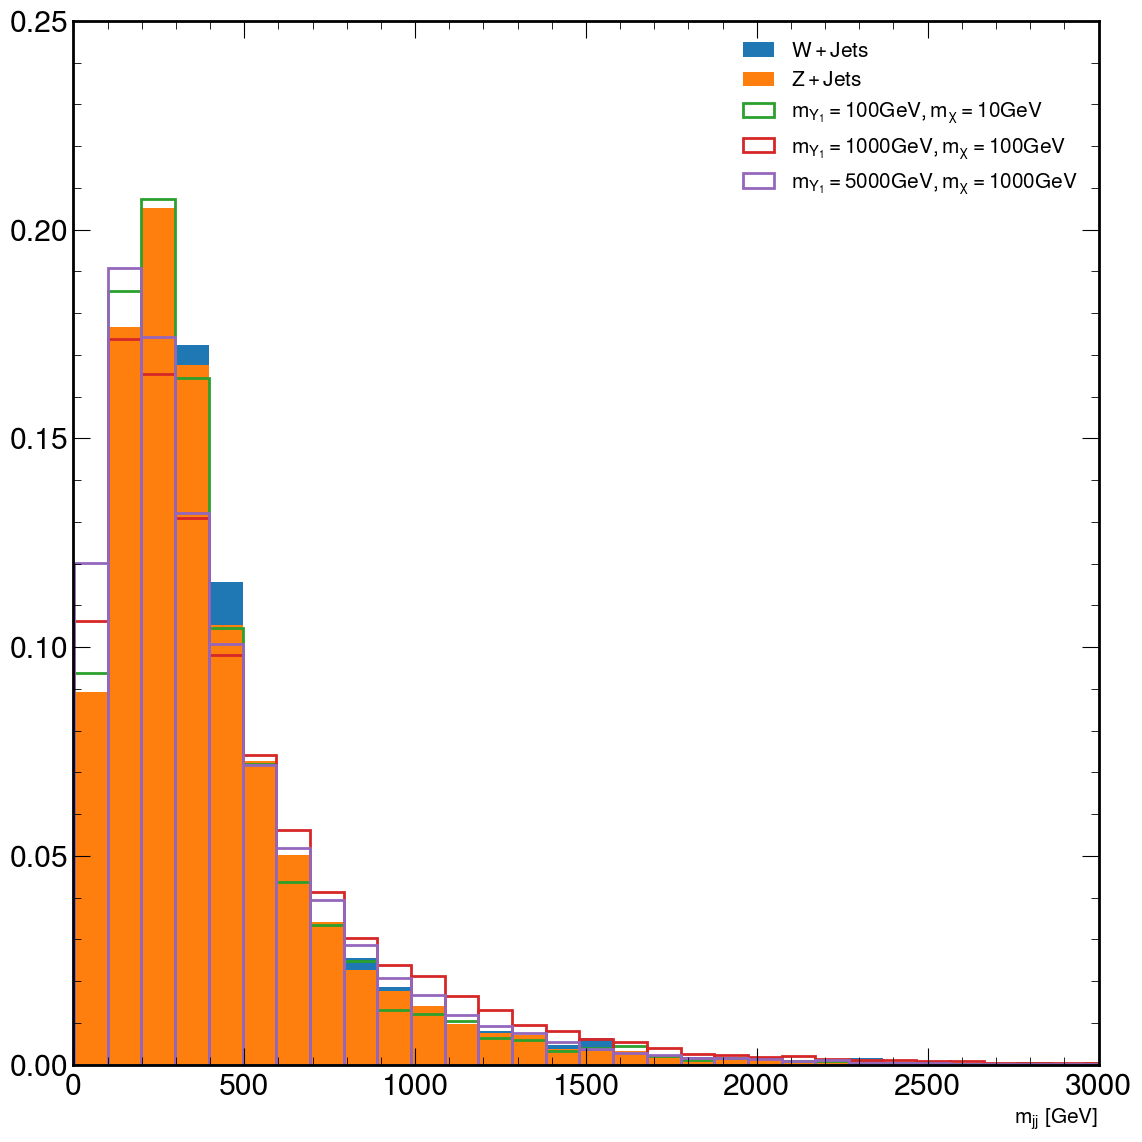

In [23]:
fig, ax = plt.subplots(figsize=(12,12))

variable = 'Inv_mass'
nBins = 40
rango = np.linspace(min(data[0][variable]), max(data[0][variable]), nBins)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colorsIter = iter(colors)

yvalues, bins, hist = ax.hist(data_WpJ[variable], bins=rango, density=True, color=next(colorsIter), label=r'$W+Jets$')
maxValue = normalize_hist(yvalues, hist)
yvalues, bins, hist = ax.hist(data_ZpJ[variable], bins=rango, density=True, color=next(colorsIter), label=r'$Z+Jets$')
maxValue = normalize_hist(yvalues, hist)

for j in range(3):
    color = next(colorsIter)
    yvalues, bins, hist = ax.hist(data[j][variable], bins=rango, density=True, color=color, edgecolor=color, fc='None', lw=2, label=massPoints[j])
    maxValue = normalize_hist(yvalues, hist)

ax.legend(fontsize=15)
ax.set_xlabel(r"$m_{jj}$ [GeV]", fontsize=15)
ax.set_xlim(0,3000)
ax.set_ylim(0,0.25)

fig.tight_layout()
plt.show()